In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Start with some data exploration
Import the files & start exploring them!

In [2]:
train_variants_df = pd.read_csv("training_variants")
test_variants_df = pd.read_csv("test_variants")
train_text_df = pd.read_csv("training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

print("Train and Test variants shape : ",train_variants_df.shape, test_variants_df.shape)
print("Train and Test text shape : ",train_text_df.shape, test_text_df.shape)

Train and Test variants shape :  (3321, 4) (5668, 3)
Train and Test text shape :  (3321, 2) (5668, 2)


In [3]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [5]:
train_text_df['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

Seems like a paper or conference proceeding

## Distributions

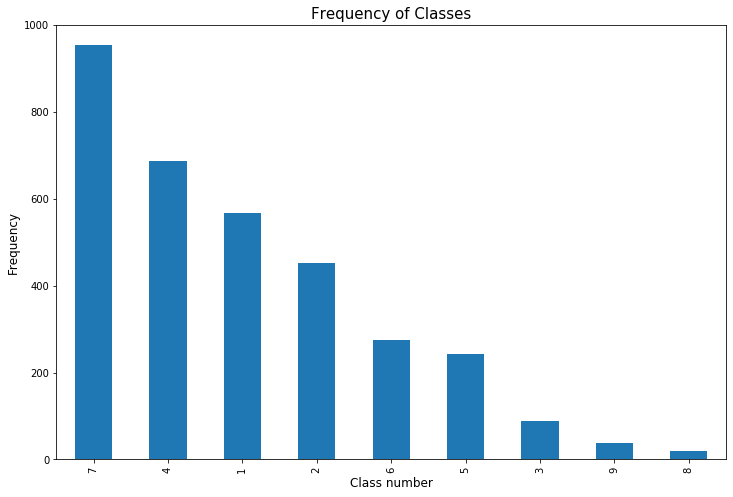

In [6]:
plt.figure(figsize=(12,8))
#sns.countplot(x="Class", data=train_variants_df)
train_variants_df.Class.value_counts().plot(kind='bar')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class number', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

Some classes are much more rare than others

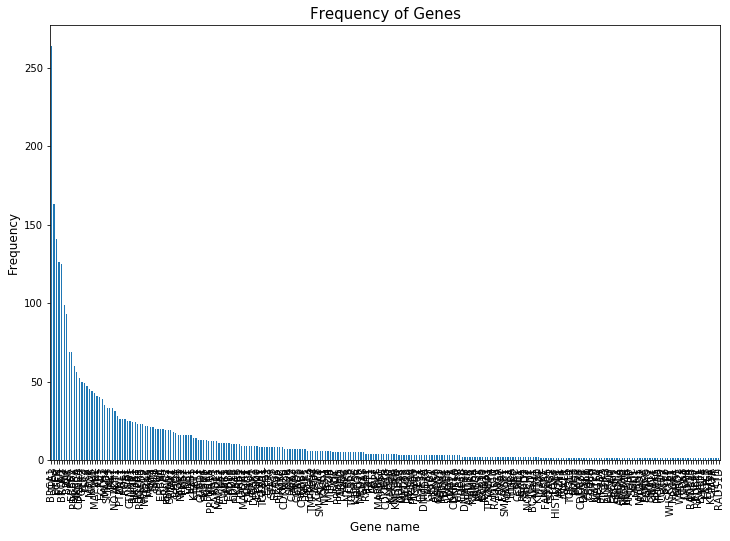

In [7]:
plt.figure(figsize=(12,8))
#sns.countplot(x="Class", data=train_variants_df)
train_variants_df.Gene.value_counts().plot(kind='bar')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Gene name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Genes", fontsize=15)
plt.show()

Seems like some genes are much more prone to mutation than others. Which genes are these?

In [8]:
geneCounts = train_variants_df.Gene.value_counts()
geneCounts.nlargest(20)

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
Name: Gene, dtype: int64

Are genes and classes correlated?

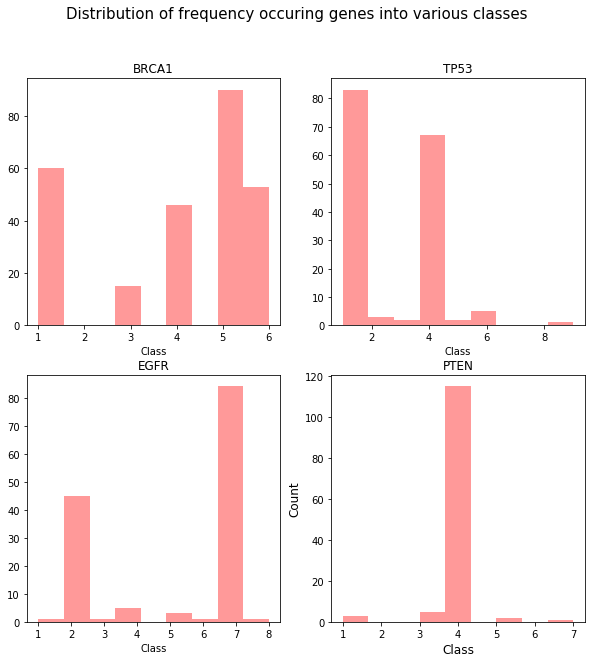

In [9]:
f,axs = plt.subplots(2,2, figsize = (10,10))
f.suptitle("Distribution of frequency occuring genes into various classes", fontsize=15)

sns.distplot(train_variants_df.loc[train_variants_df['Gene'] =='BRCA1'].Class, bins=9, kde=False, color='red',ax=axs[0,0])
axs[0,0].set_title('BRCA1')
sns.distplot(train_variants_df.loc[train_variants_df['Gene'] =='TP53'].Class, bins=9, kde=False, color='red',ax=axs[0,1])
axs[0,1].set_title('TP53')
sns.distplot(train_variants_df.loc[train_variants_df['Gene'] =='EGFR'].Class, bins=9, kde=False, color='red',ax=axs[1,0])
axs[1,0].set_title('EGFR')
sns.distplot(train_variants_df.loc[train_variants_df['Gene'] =='PTEN'].Class, bins=9, kde=False, color='red',ax=axs[1,1])
axs[1,1].set_title('PTEN')

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

It seems like the gene itself has some predictive power on the class in which it belongs

In [10]:
variationCounts = train_variants_df.Variation.value_counts()
variationCounts.nlargest(20)

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
E17K                     3
Q61L                     3
Q61H                     3
Q61R                     3
T58I                     3
I31M                     2
T167A                    2
G12S                     2
F28L                     2
R170W                    2
S308A                    2
TMPRSS2-ETV1 Fusion      2
A146T                    2
V321M                    2
Name: Variation, dtype: int64

Most mutations are protein-swaps. Does variation correlate wtih class?

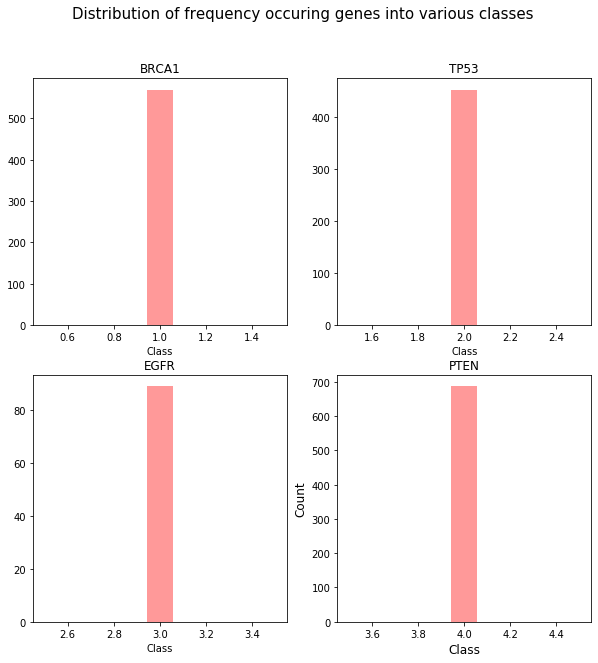

In [11]:
# unfinished section
f,axs = plt.subplots(2,2, figsize = (10,10))
f.suptitle("Distribution of frequency occuring genes into various classes", fontsize=15)

sns.distplot(train_variants_df.loc[train_variants_df['Class'] == 1].Class, bins=9, kde=False, color='red',ax=axs[0,0])
axs[0,0].set_title('BRCA1')
sns.distplot(train_variants_df.loc[train_variants_df['Class'] == 2].Class, bins=9, kde=False, color='red',ax=axs[0,1])
axs[0,1].set_title('TP53')
sns.distplot(train_variants_df.loc[train_variants_df['Class'] == 3].Class, bins=9, kde=False, color='red',ax=axs[1,0])
axs[1,0].set_title('EGFR')
sns.distplot(train_variants_df.loc[train_variants_df['Class'] == 4].Class, bins=9, kde=False, color='red',ax=axs[1,1])
axs[1,1].set_title('PTEN')

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [12]:
# replace X123X variation types with "protein swap" and look at distribution of classes for each variation
mutationTypes = {'Truncating Mutations','Deletion','Amplification','Fusions','Overexpression'}
train_variants_df['Variation_Alt'] = train_variants_df['Variation']
#train_variants_df.Variation_Alt.where(train_variants_df.Variation.isin(mutationTypes), other='Protein Swap')
train_variants_df.head()

,ID,Gene,Variation,Class,Variation_Alt
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations
1,1,CBL,W802*,2,W802*
2,2,CBL,Q249E,2,Q249E
3,3,CBL,N454D,3,N454D
4,4,CBL,L399V,4,L399V


## Now let's take a look at the text data

In [12]:
# add information about word count and character count
train_text_df["num_words"] = train_text_df["Text"].apply(lambda x: len(str(x).split()) )
train_text_df["num_chars"] = train_text_df["Text"].apply(lambda x: len(str(x)) )

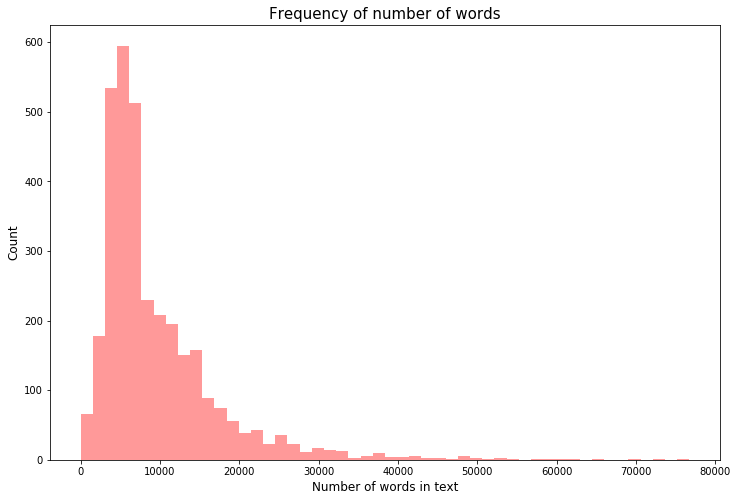

In [13]:
plt.figure(figsize=(12, 8))
sns.distplot(train_text_df.num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

In [14]:
train_text_df.num_words.describe()

count     3321.000000
mean      9542.505872
std       7845.251814
min          1.000000
25%       4733.000000
50%       6871.000000
75%      11996.000000
max      76708.000000
Name: num_words, dtype: float64

While it is interesting that some mutations have a longer text description than others, intuition tells me what it wouldn't make sense for the description length to have predictive power. Notice that the mean word count is 1; let's check if there are any entries with empty text descriptors.

In [15]:
train_text_df[train_text_df["num_words"]<5]

,ID,Text,num_words,num_chars
1109,1109,NaN,1,3
1277,1277,NaN,1,3
1407,1407,NaN,1,3
1639,1639,NaN,1,3
2755,2755,NaN,1,3


This will give us trouble -  let's remove these entries. But first, we should combine the text dataframe with the variants dataframe.

## Combine text data w/ variation data

In [17]:
train_df = train_variants_df.merge(train_text_df, how='inner', left_on='ID', right_on='ID')

In [18]:
train_df[train_df["num_words"]<500]

,ID,Gene,Variation,Class,Text,num_words,num_chars
140,140,EGFR,I491M,5,The accurate determination of perfluoroalkyl s...,430,2925
145,145,EGFR,K467T,2,The accurate determination of perfluoroalkyl s...,430,2925
259,259,EGFR,S464L,2,The accurate determination of perfluoroalkyl s...,430,2925
344,344,CDH1,A617T,4,E-cadherin is involved in the formation of cel...,187,1315
346,346,CDH1,A634V,4,E-cadherin is involved in the formation of cel...,187,1315
348,348,CDH1,T340A,4,E-cadherin is involved in the formation of cel...,187,1315
648,648,CDKN2A,Q50*,4,"The p16 gene is located in chromosome 9p21, a ...",103,706
688,688,CDKN2A,R79P,4,Cell division is controlled by a series of pos...,228,1540
692,692,CDKN2A,G93W,4,Cell division is controlled by a series of pos...,228,1540
693,693,CDKN2A,V118D,4,Cell division is controlled by a series of pos...,228,1540


In [20]:
train_df = train_df[train_df['Text'].notna()]
train_df[train_df["num_words"]<500]

,ID,Gene,Variation,Class,Text,num_words,num_chars
140,140,EGFR,I491M,5,The accurate determination of perfluoroalkyl s...,430,2925
145,145,EGFR,K467T,2,The accurate determination of perfluoroalkyl s...,430,2925
259,259,EGFR,S464L,2,The accurate determination of perfluoroalkyl s...,430,2925
344,344,CDH1,A617T,4,E-cadherin is involved in the formation of cel...,187,1315
346,346,CDH1,A634V,4,E-cadherin is involved in the formation of cel...,187,1315
348,348,CDH1,T340A,4,E-cadherin is involved in the formation of cel...,187,1315
648,648,CDKN2A,Q50*,4,"The p16 gene is located in chromosome 9p21, a ...",103,706
688,688,CDKN2A,R79P,4,Cell division is controlled by a series of pos...,228,1540
692,692,CDKN2A,G93W,4,Cell division is controlled by a series of pos...,228,1540
693,693,CDKN2A,V118D,4,Cell division is controlled by a series of pos...,228,1540


Some variations have the same text descriptor, and belong to the same class. Some variations have the same text descriptor, but belongs to a separate class (see IDs [140,145,259], and [2906,2908]). This will definitely give us trouble later on..

# Clean text data

In [21]:
import string
import re #regular expressions
from nltk.corpus import stopwords
# note: to use stopwords, first do nltk.download() to download the various corpi in nltk.

# TO DO:
# we should remove the references from the text field!! e.g., if there are references like (1,2) or [5][6]
# use regex expression to clean these up!

def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)

def cleanup(text):
    text = textClean(text)
    text= text.translate(str.maketrans("","", string.punctuation))
    return text

In [22]:
allText = train_df['Text'].apply(cleanup)

In [26]:
# before
train_df['Text'][1]

" Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, nâ€Š=â€Š8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using select c-CB

In [24]:
# after
allText[0]

'cyclindependent kinases cdks regulate variety fundamental cellular processes cdk10 stands one last orphan cdks activating cyclin identified kinase activity revealed previous work shown cdk10 silencing increases ets2 vets erythroblastosis virus e26 oncogene homolog 2 driven activation mapk pathway confers tamoxifen resistance breast cancer cells precise mechanisms cdk10 modulates ets2 activity generally functions cdk10 remain elusive demonstrate cdk10 cyclindependent kinase identifying cyclin activating cyclin cyclin m orphan cyclin product fam58a whose mutations cause star syndrome human developmental anomaly whose features include toe syndactyly telecanthus anogenital renal malformations show star syndromeassociated cyclin mutants unable interact cdk10 cyclin silencing phenocopies cdk10 silencing increasing craf conferring tamoxifen resistance breast cancer cells cdk10cyclin phosphorylates ets2 vitro cells positively controls ets2 degradation proteasome ets2 protein levels increased 

# Classify data!
https://keras.io/examples/nlp/text_classification_with_transformer/